# Module 7: Logistic Regression

## Introduction

In this module, we will introduce logistic regression and will learn how to fit and how to evaluate logistic regression models. We will discuss the assumptions and limitation of the logistic regression. We will learn how to interpret the output of logistic regression as obtained from most software. Then, we will describe receiver operating characteristics and its importance for logistic regression. 

## Learning Outcomes

In this module, you will:

* Become familiar with logistic regression analysis
* Understand the assumptions, limitations and strenghts of logistic regression
* Learn how to evaluate logistic regression models

## Reading and Resources

We invite you to further supplement this notebook with the following recommended texts:

Diez, D., Barr, C. & Çetinkaya-Rundel, M. (2017). Chapter 8: Multiple and Logistic Regression in *OpenIntro Statistics (3rd Ed.).* https://www.openintro.org/stat/textbook.php?stat_book=os


## Table of Contents

[Logistic Regression](#Logistic_Regression)

[Understanding Regression Output from Software](#Understanding_Regression_Output_from_Software)

[Evaluation of the Logistic Regression Model](#Evaluation_of_the_Logistic_Regression_Model)

[Receiver Operating Characteristic](#Receiver_Operating_Characteristic)

[Setting the Discrimination Threshold](#Setting_the_Discrimination_Threshold)

<a id="Logistic_Regression"></a>

## Logistic Regression

<br>

In contrast to linear regression analysis that is applied when the response variable is a continuous variable, logistic regression finds its application when the response variable is a categorical variable. Here, we will focus on the most prominent case, which is when the response variable is **binary**. 
Logistic regression is extremely useful, since *many real-life problems can be reduced to a problem of estimation of the value of a binary variable*. 

For example:

 - Is a customer going to buy an item? - Yes, or No
 - Is an email a spam? - Yes, or No
 - Does a patient suffer from the disease? - Yes, or No

### Introduction to logistic regression

<br>

In the previous module, we learned that the objective of a regression analysis is to estimate the value of a random variable given that we know the value of an associated variable. 

In compliance with this, we can say that *logistic regression is a form of regression analysis where the response variable is a **random categorical variable**. 

Hereafter we will limit ourselves to a case when the response variable is a **binary variable**. 

The response, $y$ thus takes the value: 

  - 1 when a certain condition is met with probability $p$
  - 0 with probability $1 - p$ when the condition is not met. 
  
The probability $p$ is often denoted as the **"odds"**. 

In logistic regression, the odds are estimated by using a framework, which incorporates the linear regression. This framework can be mathematically formulated as follows:

<center>$\text{Logit}(p_i) = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \ldots + \beta_k x_{k,i}$</center>

where:

  - $p$ denotes the **odds** of that the $y$ will take value 1
  - $x_{1, i}, x_{2, i},\ldots, x_{1, n}$ are the $i$-th values of the predictors (can be categorical or numerical)
  - $\beta_0$ is the intercept and $\beta_1, \beta_2, \ldots, \beta_n$ are the regression coefficients
  - $\text{Logit}$, or sometimes also called log-odds, is **the link function** that transforms output of the linear regression into an odds:
  
  <center>$\text{Logit}\,(p) = ln \frac{p}{1 - p(x)}$</center>
  
  from which we obtain:
  <center>$p = \frac{1}{1 + e^{\,\text{Logit}(p)}}$</center>

Estimates of the actual values of $y$ are then derived as follows:

\begin{equation}
  \hat{y}_i =
  \begin{cases}
    1 & \text{if $p_i > p_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Where $p_{th}$ is **discrimination threshold**. Most of the implementations of the logistic regression use default discrimination threshold equal to $0.5$.

**NOTE:** A major (though not the only) reason why logistic regression requires application of the link function is that linear models require the residuals to be normally distributed. Applying the linear regression directly to estimate odds $p$ would thus never be possible.

<br>

A more straightforward explanation would be that logistic regression consists of the application of a linear regression to predict the value of a variable $y'$, called a **latent variable**:

<center>$y' = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \ldots + \beta_k x_{k,i}$</center>

which is in turn used to estimate $y$ by applying following decisioning:

\begin{equation}
  \hat{y}_i =
  \begin{cases}
    1 & \text{if $y'_i > y'_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

or, even simpler

\begin{equation}
  \hat{y}_i =
  \begin{cases}
    1 & \text{if $\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \ldots + \beta_k x_{k,i} > y'_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

where $y'_{th}$ is a discrimination threshold of the latent variable $y'$.

### Visual interpretation

<br>
The figure below shows association between the odds $p$ and logit function of odds - $\text{Logit}\,(p)$. The assocation between the two is a monotonically increasing sigmoid curve with inflection point located at ($p = 0.5$, $\text{Logit}\,(p) = 0$). When the odds are greater than $0.5$, values of $\text{Logit}\,(p)$ are positive and predicted response is $\widehat{y} = 1$. Conversely, when the odds are lower than $0.5$, values of $\text{Logit}\,(p)$ are negative and predicted response is $\widehat{y} = 0$. 


![title](./logit_function_modif.png "Visual interpretation")

Image source: Diez et al, (2015)

<a id="Underlying_Assumptions"></a>

### Underlying assumptions

<br>

Logistic regression is based on **a different set of assumptions** about the relationship between dependent and independent variables than those of linear regression. Some differences between the two methods are obvious, and stem from the distinct nature of the response variable. These include:

 - **No requirement of linearity** of the relationship between the response and predictor 
 - **No requirement of homoskedasticity** of the response variable.

Other key differences in the underlying assumptions, which are less obvious include:

  - The distribution of $\theta$ is **a Bernoulli distribution**, rather than a Gaussian (normal) distribution.
  
  - Logistic regression makes **no particular assumptions about the distribution of the model residuals**.
  
On the other hand, some other assumptions of linear regression hold here too:

  - Logistic regression requires the observations to be **independent** of each other.  
  - Logistic regression requires there to be little or **no multicollinearity** among the independent variables.
  
  For more on multicollinearity, see Multicollinearity, (n.d.): https://en.wikipedia.org/wiki/Multicollinearity

### Fitting the logistic regression model

<br>

There is a substantial difference between the methods used to fit linear and logistic regression models: 

  - The linear regression the model parameters are estimated by **minimizing the sum of squares of model residuals**.
  - The logistic regression model parameters are estimated by **maximizing the probability of obtaining the set of observations of binary response $y$**, given the parameter estimates. 
    
This latter procedure is called **maximum likelihood estimation**. 

If you are interested, its thorough explanation can be found here (Weisstein, E. W., 2018): http://mathworld.wolfram.com/MaximumLikelihood.html. 

Its application to fiting the logistic regression models is further described here (Czepiel, S.A., 1999): https://czep.net/stat/mlelr.html.

<br>

#### Newton method

The parameters maximizing the likelihood are typically identified through an iterative process called **Newton method**, which starts with a tentative solution - a set of initial parameter estimates of $\beta$. These estimates are then improved by repetitively applying the following two steps:

  1.  Solution revised slightly, to test if it can be improved. 
  2.  If improved, revised solution is adopted as a candidate solution instead of the previous one. 
  
This process is repeated until no more improvement is made, at which point the process is said to have converged. The resulting set of parameter estimates is then called **optimal**.

There are two **important practical consequences** of this approach:

  1. Estimation of logistic regression parameters is typically fairly slow (i.e. - requires much more computational time than is the case of linear regression).
  2. Accurate estimation of logistic regression parameters requires larger amount of observation as compared to linear regression. **The rule of ten** states (without any scientific rigor) that logistic regression models requires a minimum of about 10 observations per predictor variable.


## EXERCISE 1:

With the dataset provided in the file 'ucla_binary.csv', use logistic regression to estimate whether a student will be admited to the university using the **student's GPA** and **GRE score** along with the **rank** indicating the prestige of the student's undergraduate institution.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# And some function we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [ ]:
# Read the data
df = pd.read_csv("./ucla_binary.csv")


In [ ]:
# your work here

#### Solution

In [ ]:
# Let's take a look on the first few rows
df.head()

In [ ]:
# Let's take a look on the statisics across individual columns
df.describe()

In [ ]:
# Plot the histograms of the individual columns
df.hist(figsize=(7,5))
plt.show()

Rank is ordinal variable. Here, we will convert to set of dummies which will then be used as a predictors in our logistic regression model.

In [ ]:
dummy_ranks = pd.get_dummies(df['rank'], prefix='rank')
df = df.join(dummy_ranks)

Now we can fit the model

In [ ]:
# Fit the model
predictors = ['gpa', 'gre', 'rank_1', 'rank_2', 'rank_3', 'rank_4']
m = Logit(df['admit'], df[predictors])
m = m.fit()

Let's take a look on the resulting regression parameters.

In [ ]:
m.params

And let's take a look on the model summary. 
Don't worry about all of the values you see below - the meaning of some of the values will be discussed later.

In [ ]:
print(m.summary2())

Now, let's derive the estimates of the odds.

In [ ]:
df.loc[:, 'p'] = m.predict(df[predictors])

We can now plot the relationship between the values of logit(p) and odds (p) along the actual values of the response (admission).

In [ ]:
df = df.sort_values(by = ['p'], axis = 0)
plt.plot(logit(df.p), df.p, '--')
plt.plot(logit(df.p), df.admit, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

We can also plot the boxplot to see the distribution of the estimated odds for the both value of the actual response.

In [ ]:
df.boxplot(column='p', by = 'admit')
plt.show()

Now we wil derive the binary estimates $\hat{y}$ of the response $y$.

In [ ]:
df.loc[:, 'yhat'] = (df.p > 0.5) * 1
df.yhat.value_counts()

Now we can create was is called a **confusion matrix** to see how well our estimates match the actual values.

In [ ]:
pd.crosstab(df.admit, df.yhat)

In the confusion matrix above, we see that we have 254 cases when student was correctly estimated to be not admitted and 30 cases when student was correctly estimated to be admitted. The remaining 97 + 19 estimates were incorrect.

In [ ]:
# More straightforward way
m.pred_table()

---

<a id="Understanding_Regression_Output_from_Software"></a>

## Understanding Regression Output from Sofware

<br>

Similar to linear regression, most software provides a standardized summary of the logistic regression analysis. This typically contains several measures for the evaluation of the performed regression. 

The summary is usually very similar to that of linear regression (discussed in the previous module). However, there are several notable differences. Let's take a look at them.


We will print summary of the model from the previous exercise.

In [ ]:
print (m.summary2())

  - **Converged** indicates whether the solver - the algorithm used to find the regression parameters (per default it is a Newton method) converged successfully. In a very plain words, it indicates whether the regression analysis was cussefull, or failed.
  
  - **No. Iterations** is the number of iterations the solver needed to find he solution.
  
  - **Pseudo R-squared** is one of the measures for assessment of the model quality. For more details, see following section.
  
  - **LL-null** is log-likelihood of the null model, i.e. the model without predictors, where $\text{logit}(p) = \beta_0$. 
  
  - **Scale** is the scale parameter for the covariance matrix. For more details see Rodríguez, G. (2007) for an example: http://data.princeton.edu/wws509/notes/c3.pdf
  
  - **z** is the value of the **z-statistic**, which is calculated as:
 
 <center>$z_{\hat{\beta}} = \frac{\hat{\beta} - \beta_0}{s.e.(\hat{\beta})}$</center>
 
 where $\beta_0$ are null value against which we are testing the coefficient estimate. In this case (and in most cases) they are equal to zero.
 
 
 - **P > $|$z$|$** - is the p-value associated with the given parameter, i.e. the probability that the true value of the given regression parameter is equal to the null value, given the set of observations.

<a id="Evaluation_of_the_Logistic_Regression_Model"></a>

## Evaluation of the Logistic Regression Model

<br>

As we said before, the response in logistic regression is a categorical variable, which means that $R^2$ and RMSE are not of use here. When evaluating the logistic regression models, we want to assess how well the estimates for $\hat{y}$ match the actual values of $y$. 

Here, we describe several measures for evaluation of logistic regression. Many of these are the subject of a much broader topic, know as **evaluation of binary classifiers**. 

**NOTE:** There are numerous other measures and approaches that are used to assess the logistic regression.

<br>

#### Pseudo R-squared

In analogy to the coefficient of determination $R^2$ of the linear regression that measures the amount of variance captured by the model, logistic regression can be evaluated by the pseudo $R^2$. The word pseudo here is meant to highlight the fact that the it is not an actual fraction of variance. There is currently no agreement upon how to formulate the best analogous measure of $R^2$ for logistic regression analysis. Therefore, there are multiple competing measures, commonly denoted as a pseudo $R^2$. 

The most common formulations include:

  - Efron's $R^2$: 
  
    $R^2 = 1 - \frac{\sum_i^N (y_i - p_i)^2}{\sum_i^N (y_i - \bar{y})^2}$
    
    where:
    
      - $y_i$ is the actual value of the $i$-th respone 
      - $\bar{y}$ is the mean of the response (i.e. fraction of y = 1)
      - $N$ is the number of observations
      - $p_i$ is the predicted odds of the $i$-th response
      
      
  - Cox and Snell's $R^2$:
  
    $R^2 = 1 - \Bigg(\frac{L_M}{L_0}\Bigg)^{\frac{2}{n}}$
    
    where:
    
      - $L_M$ is the log-likelihood of the actual model
      - $L_0$ is the log-likelihood of the null model
      
      
  - McFaddends $R^2$:
  
    $R^2 = 1 - \Bigg(\frac{\text{ln}(L_M)}{\text{ln}(L_0)}\Bigg)$
    
    where:
    
      - $L_M$ is the log-likelihood of the actual model
      - $L_0$ is the log-likelihood of the null model      


<br>

#### Confusion matrix

**Confusion matrix** is a matrix comprising two rows and two columns:

|                        |  $\mathbf{\hat{y} = 0}$ |  $\mathbf{\hat{y} = 1}$  |
| -----------------------| ------ -----------| ------------------ |
| $\mathbf{y = 0}$       |      **TN**       |        **FP**      |
| $\mathbf{y = 1}$       |      **FN**       |        **TP**      |
|                        |	                 |                    |

where:

 - **TP** (**true positives**) is the number of cases where estimated value and actual value were both equal to 1.
 - **FP** (**false positives**) is the number of cases where estimated value was qual to 1, while the actual value was equal to 0
 - **FN** (**false negatives**) is the number of cases where estimated value was qual to 0, while the actual value was equal to 1
 - **TN**  (**true negaives**) is the number of cases where estimated value and actual value were both equal to 0.
 
An example of a true positive case could be a spam email that was correctly moved to a spam box by the filtering algorithm. Similarly, a true negative case would be a regular email that was not moved to spam.
 

#### Statistical accurracy 
 
Naturally, the better the model the greater number of true positives and true negative, while lower the number of false positives and false negatives. This notion can be embedded into a following formula:

<center>$\text{ACC} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{FN} + \text{TN}}$</center>

which can be then simplified to:

<center>$\text{ACC} = \frac{\text{TP} + \text{TN}}{N}$</center>

where, 

 - ACC is **statistical accuracy** of the model
 - TP and TN are numbers of true positives and true negates, respectively
 - FP and FN are numbers of false positives and false negates, respectively
 - N is the total number of observations
 

The statistical accuracy, or simply **accuracy** of the logistic regression, is the most prominent measure for evaluation of the logistic regression models. The value of accuracy range from 0 to 1, but accuracy is frequently reported as percentage.

#### A word of caution with statistical accuracy

Accuracy can be a very misleading indicator of the logistic regression model, if the number of positive ($y = 1$) and negative cases ($y = 0$) is highly unbalanced. Imagine the cases where out of 100 cases only 5 are positive. Then, even the trivial regression model ($\beta = 0$) whose estimates $\widehat{y}$ are always equal zero will achieve 95% accuracy.

<br>

#### Matthews correlation coefficient (MCC)

A common alternative to statistical accuracy is **Matthews correlation coefficient (MCC)**, which is defined as:

<br>

<center>$\text{MCC} = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$</center>

The advantage of MCC over ACC is its robustness against the unbalanced binary response $y$. Its obvious disadvantage is that it is harder to interpret as compared to ACC.

<br>

#### Precision, recall, specificity and F-score

**Precision** (also known as positive predictive value) is the fraction of correct estimates of the all positive estimates:

<center>$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$</center>

**Recall** (also known as true positive rate, or **sensitivity**) is the fraction of correct estimates of the postive response:

<center>$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$</center>

**Specificity** (also known as true negative rate) is the fraction of correct estimates of the negative response:

<center>$\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$</center>

**F1-score** (sometimes called F-measure, or Dice coefficient) is the harmonic mean of the precision and recall:

<center>$F_1 = 2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision} + \text{Recall}}$</center>

In some cases, we may put more emphasize on either precision, or recall, which can be done as follows:

<center>$F_\beta = (1 + \beta^2)\cdot\frac{\text{Precision}\cdot\text{Recall}}{\beta^2 \cdot\text{Precision} + \text{Recall}}$</center>

where $\beta$ (non-negative real value) is a weighting factor, which indicate how much importance we give recall over precision ($\beta$ attaches $\beta$ times as much importance to recall as precision).


**Importantly**, *precision, recall and F-score require only true positives, false positives, false negatives, but not true negatives.* This allows their utilization in cases we have certainity about the response only if positive. This plays an important role some applications (see following example).

#### Example: 

Imagine $y$ is a binary response indicating whether two chemicals react.

- $y=1$ indicates the reaction of the two chemicals was experimentally validated
- $y=0$ indicates otherwise

However, we cannot be sure that the given two chemicals **do not** react, as there is an option that their reaction has never been tested. 

Accuracy, and MCC, cannot be used here, they require a statistic about true negatives, which in this case cannot be obtained.

## EXERCISE 2:

Evaluate the logistic regression model from the previous exercise using the statistical accuracy, MCC, precision, recall, etc.

In [ ]:
#your work here

#### Solution

Let's begin with the confusion matrix

In [ ]:
conf_mat = m.pred_table()
print (conf_mat)

Now we can extract the TP, FP, FN and TP

In [ ]:
tn, fp, fn, tp = conf_mat.flatten()
print (tn, fp, fn, tp)

Finally, we can calculate the accuracy, MCC, etc..

In [ ]:
acc = (tp + tn) / np.sum(conf_mat)
print ("Accuraccy of the model is: %1.2f" % acc)

In [ ]:
mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))
print ("Mathews correlation coefficient between the estimates and the true response is: %1.2f" % mcc)

In [ ]:
prc = tp / (tp + fp)
rec = tp / (tp + fn)
print ("Model's precision is %1.2f and it's recall is %1.2f" % (prc, rec))

---

<a id="Receiver_Operating_Characteristic"></a>

## Receiver Operating Characteristic

The **Reciever Operating Characteristic (ROC)** is a graphical, yet very powerful way for evaluation of the logistic regression model. A ROC plot illustrates the relationship between the **true positive rate (TPR)** (**Sensitivity**) and the **false positive rate (FPR)** (1 - **specificity**) at various discrimination threshold settings.

For each discrimination threshold, $d_{th}$ we will obtain a different set of estimates $\widehat{y}$. Sequentialy increasing the discrimination threshold from $0$ to $1$, we will obtain an increasing fraction of $\widehat{y} = 0$ estimates. 

For each set of estimates, we calculate the sensitivity and specificity. We can then plot the dependence of sensitivity on 1 - specificity. 

This way we obtained what is called the **Receiver Operating Characteristics** curve. 

Typically, the curve look like the Figure below - an arch bending above the identity line (thin diagonal line).

Image source: Roccurves.png (2006) https://commons.wikimedia.org/wiki/File:Roccurves.png
![title](./ROC_curve.png "Visual interpretation")

Sensitivity and (1- Specificity) define what is called a **ROC space**. The top-left corner of the ROC space is often referred to as the **error-free point**. This is the point at which both sensitivity and specificity would be equal to 1, i.e. all the estimates would be correct (either true positives or true negatives) and there would be no false positives, nor false negatives. In practice, no ROC curve can achieve the error-free point, but **the closer to the error-free point the ROC curves goes, the better the model.**.

  - The model that generates estimates at random is expected to produce ROC curve identical to the identity line. 
  
  
  - The model that produces ROC below the identity line is generating estimates that are worse than random. **Note:** estimates of such a consistently bad predictor could simply be inverted to obtain a good predictor.
  
There are various quantifying parameters summarizing the information comprised in the ROC. 

These include: **area under ROC curve** and **Youden's J**.

#### Area Under ROC Curve (AUROC)

Integrating the ROC curve we will obtain what is called the **area under the the receiver operating characteristics curve (AUROC)** (often abbreviated simply as area under curve **AUC**, sometime called also c-statitics, or a-prime). 

*The AUC is equal to the probability that a model will estimate a randomly chosen binary response better than a random estimator.* 

The greater the AUC value, the better the model. 

  - The model whose estimates are generated at random is expected to result in $\text{AUC} = 0.5$ (area under the identity line).
  
  
  - The model that produces the $\text{AUC} < 0.5$ performs worse than a random estimator.
  
AUROC is a very powerful measure for evaluation of the discrimination ability of the logistic regression models. *Its advantage over the measures that were decribed previously (MCC, Accuracy, etc.) stems from the fact that it is independent of the particular choice of discrimination threshold and evaluates the model's overall capacity to discriminate between positive and negative responses across all possible thresholds.*.

#### Youden's J

The point on the ROC curve that is closest to the **error-free point** (0,1) is the point *where the sum of sensitivity and specificity is maximimal.* 

Therefore, the discrimination threshold corresponding to that point is often considered to be the **optimal threshold**. The vertical distance beween this point and the identity line is called **Youden's J**: 

Image Source: Roc Curve Youden J.png (2014), https://commons.wikimedia.org/wiki/File:ROC_Curve_Youden_J.png
![title](./ROC_Curve_Youden_J.png "Youden J visualisation")

Youden's J is and important measure characterizing *to what extend the sensitivity and specificity of the model can be maximized by optimal choice of the threshold*. 

Mathematically, Youden's can be expressed by means of sensitivity and specificity as follows:

<center>$J = \text{max}\{\text{sensitivity} + \text{specificity} - 1\}$</center>

#### Point of balance

The intercept of the ROC curve with the diagonal line going from top left corner to bottom right corner, indicates the point of the ROC curve where specificity equals sensitivity. The corresponding value of the discrimination threshold is also often considered optimal. The product of specificity and sensitivity is another important measure evaluating the logistic regression model.

<br>

## EXERCISE 3:

  - Generate receiver operting characteristics (ROC) of the logistic regression model from the previous exercises. 
  - Calculate the area under the ROC curve
  - Identify the point where model's sensitivity equal its specificity
  - Identify the point that maximizes the sum of sensivity and specificity
  - Idenfity the point corresponding to the default descrimination threshold ($d_{th} = 0.5$)

In [ ]:
#your work here

#### Solution

We will first generate the ROC curve. For the set of pre-specified discrimination threshold, we will calculate sensitivity and specificity. 

We will also calculate the accuracy and MCC which we will use in the following exercise.

In [29]:
# Set discrimination thresholds
ths = np.arange(0., 1.0, 0.025)

# Containers
sensitivity = []
specificity = []
accuracy = []
matthews = []

# Main loop
for th in ths:
    # Generate estimates
    conf_mat = m.pred_table(threshold=th)
    
    # Extract TN, FP, ...
    tn, fp, fn, tp = conf_mat.flatten()
    
    # Calculate sensitivity and specificity
    sens = (1. * tp) / (tp + fn)
    spec = (1. * tn) / (tn + fp)    
    
    # Calculate ACC and MCC
    acc = (tp + tn) / np.sum(conf_mat)
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))    

    # Add to containers
    sensitivity.append(sens)
    specificity.append(spec)
    accuracy.append(acc)
    matthews.append(mcc)

/anaconda3/envs/New-Course/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [30]:
# Bind all the numbers together
roc = pd.DataFrame({'discret_thr' : ths, 
                    'sensitivity' : sensitivity, 
                    'specificity' : specificity,
                    '_specificity' : [1 - x for x in specificity],
                    'accuracy' : accuracy, 
                    'matthews' : matthews})

# Sort by 1 - specificity so we can plot it easily
roc = roc.sort_values(by = "_specificity")

Now we can plot the ROC curve.

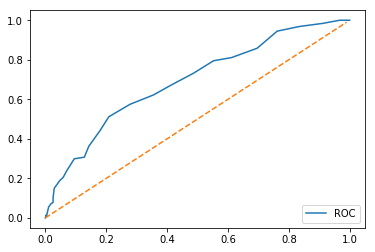

In [31]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')
plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.legend(loc = 4)

We will calculate the AUC, by integrating the sensitivity as a function of 1 - specificity

In [33]:
auc = np.trapz(y = roc.sensitivity, x = roc._specificity)
print ("Area under ROC curve = %1.2f" % auc)

Area under ROC curve = 0.69


We can now identify the threshold corresponding to the balanced sensitivity and specificity as well as the threshold corresponding to the balanced specificity and sensitivity. 

In [36]:
# Where threshold equal 0.5
idx_default_th = np.where(roc.discret_thr == 0.5)[0][0]

# Max sum of spec and sens
idx_youdensj = np.argmax(roc.sensitivity + roc.specificity)

 # Ballanced spec and sens
idx_ballance = np.argmin(np.abs(roc.sensitivity - roc.specificity))

Now we will highlight the point corresponding to the selected thresholds within the ROC curve.

In [ ]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')


plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

Now we can take a look at the confusion matrix at different points of the ROC curve.

In [37]:
m.pred_table(threshold=roc.discret_thr[idx_youdensj])

array([[216.,  57.],
       [ 62.,  65.]])

In [38]:
m.pred_table(threshold=roc.discret_thr[idx_ballance])

array([[176.,  97.],
       [ 48.,  79.]])

Finally we can calculate the Youden's J

In [39]:
J = max(roc.sensitivity + roc.specificity - 1)
print ('Youden\'s J = %1.2f' % J)

Youden's J = 0.30


<a id="Setting_the_Discrimination_Threshold"></a>

## Setting the Discrimination Threshold

<br>


The logistic regression models are always **well calibrated**, which means that *the mean of the predicted odds is equal to mean of the binary response*. 

Mathematically:

\begin{equation}
    \frac{1}{n} \sum_i^n p_i = \frac{1}{n} \sum_i^n y_i
\end{equation}

or, in a more compact form:

\begin{equation}
    \sum^{n}_i p_i - y_i = 0
\end{equation}

An important consequence of this fact is that using the default **discrimination threshold** $p_{th} = 0.5$, we may sometimes obtain estimates that are quite off the actual response values and the number of predicted positives ($\widehat{y} = 1$) can be much lower/higher than the actual number of positives ($y = 1$). In such case, we say that the model is not **discriminative**.

#### Example

We can take a look at the mean of the predicted odds of the model fron the previous exercises and compare it to the mean of the actual response:

In [40]:
print ('Odds mean: %1.2f' % np.mean(df['p']))
print ('Response mean: %1.2f' % np.mean(df['admit']))

Odds mean: 0.32
Response mean: 0.32


Now we will compare the number of predicted and true positives:

In [42]:
print ('Predicted positives #: %i' % np.sum(df['p'] > 0.5))
print ('True positives #: %i' % np.sum(df['admit'] > 0.5))

Predicted positives #: 49
True positives #: 127


Or, we can take another look at the confusion matrix:

In [43]:
print (conf_mat)

[[273.   0.]
 [127.   0.]]


In [44]:
# Predicted negatives and positives
conf_mat.sum(axis = 0)

array([400.,   0.])

In [45]:
# Actual negatives and positives
conf_mat.sum(axis = 1)

array([273., 127.])

<br>

To tackle this issue, we may need to shift the discrimination threshold $p_{th}$ used to derive the estimates $\hat{y}$:


\begin{equation}
  \widehat{y}_i =
  \begin{cases}
    1 & \text{if $p_i > p_{th}$}\,, \\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Shifting the discrimination threshold, we may improve the discrimination of the model. 

  - Lowering the threshold $p_{th}$ we are increasing the number of predicted positives ($\widehat{y} = 1$), while increasing the threshold we are decreasing that number. 

  - Increasing the number of predicted positives ($\widehat{y} = 1$) increases the chances of so called **type I error** that is **false positive rate**
  
  - Decreasing the number of predicted positives ($\widehat{y} = 1$) increases the chances of so called **type II error** or **false negative rate**. 

**NOTE:** We must always be very careful when adjusting the discrimination threshold. The discrimination threshold can be set to maximize some of th measures we described above:

  - **Maximizing accuracy** - will maximize fraction of the true estimates (TP + TF). This can be very misleading in cases when the response is very unbalanced.
  
  
  - **Maximizing MCC** - will maximize the "correspondence" between the estimates and actual response values. 
  
As indicated in the previous section, the discrimination threshold can be set using the **Receiver Operating Characteristic (ROC)** so that the selected threshold:

  - **Maximizes the sum sensitivity and specificity** (Youden's J)
  
  
  - **Balances the sensitivity and specificity** (Point of balance)
  
**NOTE:** maximizing the MCC will also maximize the **sum of sensitivity and specificity**. You can see this easily by comparing the formula of MCC and those for sensitivty and specificity.

## EXERCISE 4:

Using the logistic regression model from the previous exercises:

  - Plot the dependence of the accuracy and MCC on the choice of the discrimination threshold
  
  - Optimize the discrimination threshold to:

      - Maximize the statistical accuracy of the model
  
      - Maximize the MCC of the model
  
  - Use the ROC to highlight the ROC points that corrspond to the obtained thresholds. How much does the obtained thesholds differ from the ROC points identified in the previous exercises?

In [ ]:
# your work here

#### Solution

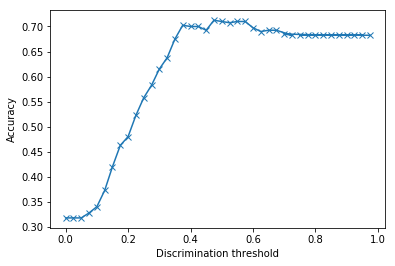

In [46]:
plt.plot(roc.discret_thr, roc.accuracy, 'x-')
plt.xlabel('Discrimination threshold')
plt.ylabel('Accuracy')
plt.show()

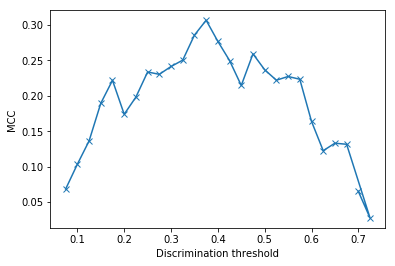

In [47]:
plt.plot(roc.discret_thr, roc.matthews, 'x-')
plt.xlabel('Discrimination threshold')
plt.ylabel('MCC')
plt.show()

Identify the points of the ROC curve where the obtained accuracy and MCC reach the respective maxima.

In [48]:
idx_maxacc = np.argmax(roc.accuracy)
idx_maxmcc = np.argmax(roc.matthews)

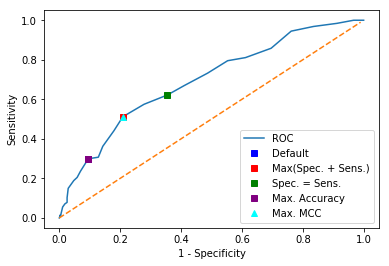

In [49]:
plt.plot(roc._specificity, roc.sensitivity, label = 'ROC')

plt.plot(np.arange(0., 1., 0.01), 
         np.arange(0., 1., 0.01), 
         '--')

plt.plot(roc._specificity[idx_default_th], 
         roc.sensitivity[idx_default_th], 
         's', color = 'blue',
         label = 'Default')

plt.plot(roc._specificity[idx_youdensj], 
         roc.sensitivity[idx_youdensj], 
         's', color = 'red',
         label = 'Max(Spec. + Sens.)')

plt.plot(roc._specificity[idx_ballance], 
         roc.sensitivity[idx_ballance], 
         's', color = 'green', 
         label = 'Spec. = Sens.')

plt.plot(roc._specificity[idx_maxacc], 
         roc.sensitivity[idx_maxacc], 
         's', color = 'purple',
         label = 'Max. Accuracy')

plt.plot(roc._specificity[idx_maxmcc], 
         roc.sensitivity[idx_maxmcc], 
         '^', color = 'cyan', 
         label = 'Max. MCC')

plt.legend(loc = 4)
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

As can be seen, the ROC point of maximal accuracy is quite distant from maximal MCC. 

The maximal MCC is identical to maximum of the sum of specificity and sensitivity. 

The ROC point of balanced senitivity and specificty differs from both maximal accuracy and maximal MCC. 

This highlights the fact that the model's discrimination threshold can be optimized in multiple ways.


---

**End of Module.**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments, and to the next module.

## References


Czepiel, S.A. (1999). *Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation* Retrieved Dec 11, 2018 from czep.net/stat. 

Multicollinearity, n.d. Retrieved Dec 11, 2018 from Wikipedia. https://en.wikipedia.org/wiki/Multicollinearity

Roccurves.png (2006). Retrieved Dec 11, 2018 from Wikimedia Commons. https://commons.wikimedia.org/wiki/File:Roccurves.png Creative Commons Attribution-Share Alike 3.0 Unported.

Roc Curve Youden J.png (2014). Retrieved Dec 11, 2018 from Wikimedia commons. https://commons.wikimedia.org/wiki/File:ROC_Curve_Youden_J.png  Creative Commons Attribution-Share Alike 4.0 International.

Rodríguez, G. (2007). Lecture Notes on Generalized Linear Models. Chapter 3: Logit Models for Binary Data http://data.princeton.edu/wws509/notes/

Weisstein, E. W. (2018). *Maximum Likelihood.* MathWorld-A Wolfram Web Resource. Retrieved Dec 11, 2018 form http://mathworld.wolfram.com/MaximumLikelihood.html



